# 0 The objective of this notebook is to train and test some ML models to achieve our 73% accuracy metric 




As we could see, the version of data that gave us the best metrics were base_v1

In [4]:
#---------Importing libraries---------#

#---Data analysis---#
import pandas as pd
import numpy as np


#---Data splitting---#
from sklearn.model_selection import train_test_split

#---classification models---#
from sklearn.linear_model import LogisticRegression

#---evaluation---#
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

#---visualization---#
import matplotlib.pyplot as plt

#---utils---#
import os

#---data---#
df = pd.read_csv('data/raw/base_v6_X4.csv')


#---------Models---------#
#emsemble
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC


In [5]:
def specificity_score(y_test, y_pred, file_name):
    '''Info:
    Specificity score is the proportion of negative cases that were correctly identified.
    It is calculated as: TN / (TN + FP)
    ------------------------------------------------------------------------------------
    Input:
    y_test: true labels
    y_pred: predicted labels
    ------------------------------------------------------------------------------------
    Output:
    specificity score
    ------------------------------------------------------------------------------------
    '''

    # Replace None values with a default value (e.g., -1)
    y_test = np.where(y_test is None, -1, y_test)
    y_pred = np.where(y_pred is None, -1, y_pred)
    tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp + 1e-8)
    print('Specificity score: {:.2%} '.format(specificity))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.title('Confusion matrix for {}'.format(file_name))
  



In [6]:
#function that receives the dataset, and the model and returns the accuracy and specificity scores

def model_evaluation(patch, model):
    '''Info:
    This function receives the dataset and the model and returns the accuracy and specificity scores
    -----------------------------------------------------------------------------------------------
    Input:
    patch: the path of the dataset
    model: the model to be used
    -----------------------------------------------------------------------------------------------
    Output:
    accuracy_score: the accuracy score
    specificity_score: the specificity score
    -----------------------------------------------------------------------------------------------
    '''
    df = pd.read_csv(patch)
    #print final part of the path ( everything after the last /)
    file_name = patch.split("/")[-1]
    print(f'\nThe path of the dataset is: {file_name}')
    #print the shape of the dataset
    print('The shape of the dataset is: {}'.format(df.shape))
    X = df.drop(columns=['Y'])
    y = df['Y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy score: {:.2%} '.format(accuracy_score(y_test, y_pred)))
    print('AUC ROC score: {:.2%} '.format(roc_auc_score(y_test, y_pred)))
    specificity_score(y_test, y_pred, file_name)
   

# 1 Trying different and more complex models

## 1.0 Ridge Regression classifier




The path of the dataset is: base_v6_X4.csv
The shape of the dataset is: (109, 6)
Accuracy score: 72.73% 
AUC ROC score: 71.67% 
Specificity score: 60.00% 


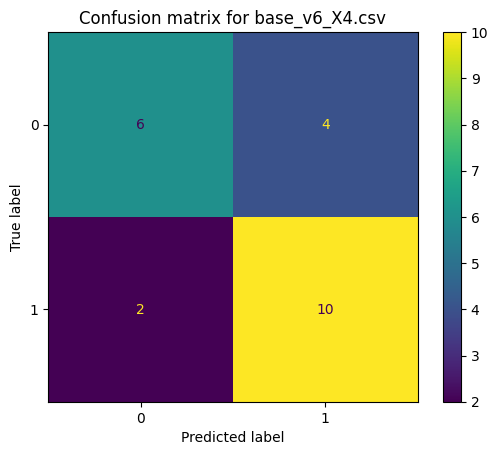

In [9]:
model_evaluation('data/raw/base_v6_X4.csv', RidgeClassifier(random_state=42))

## 1.1 XGBoost

trying one of the most popular models for classification problems in every dataset

In [11]:
dfs = [df for df in os.listdir('data/processed') if df.endswith('.csv')]


The path of the dataset is: ACME-HappinessSurvey2020.csv
The shape of the dataset is: (126, 7)
Accuracy score: 65.38% 
AUC ROC score: 66.36% 
Specificity score: 60.00% 

The path of the dataset is: base_v1.csv
The shape of the dataset is: (109, 7)
Accuracy score: 59.09% 
AUC ROC score: 58.33% 
Specificity score: 50.00% 

The path of the dataset is: base_v2.csv
The shape of the dataset is: (109, 5)
Accuracy score: 59.09% 
AUC ROC score: 57.50% 
Specificity score: 40.00% 

The path of the dataset is: base_v3.csv
The shape of the dataset is: (109, 7)
Accuracy score: 50.00% 
AUC ROC score: 50.00% 
Specificity score: 50.00% 

The path of the dataset is: base_v4.csv
The shape of the dataset is: (109, 6)
Accuracy score: 59.09% 
AUC ROC score: 58.33% 
Specificity score: 50.00% 

The path of the dataset is: base_v5.csv
The shape of the dataset is: (109, 6)
Accuracy score: 59.09% 
AUC ROC score: 58.33% 
Specificity score: 50.00% 

The path of the dataset is: base_v6_X1.csv
The shape of the data

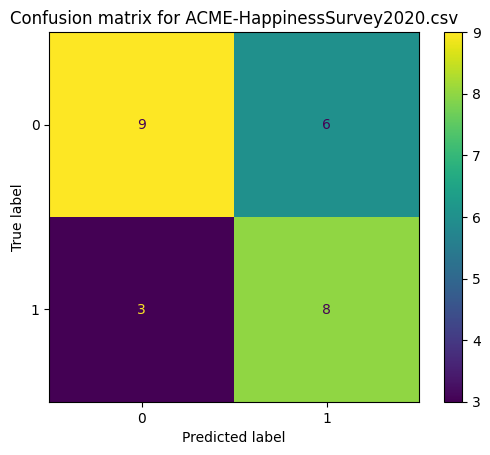

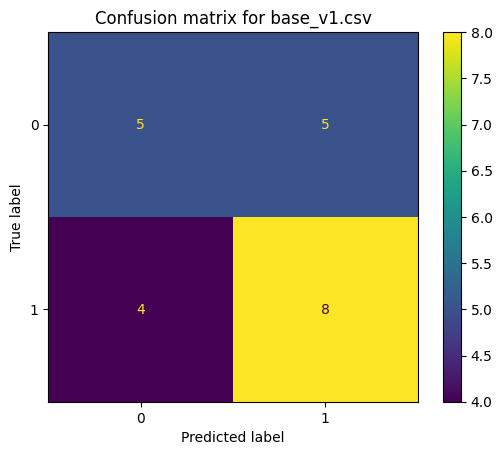

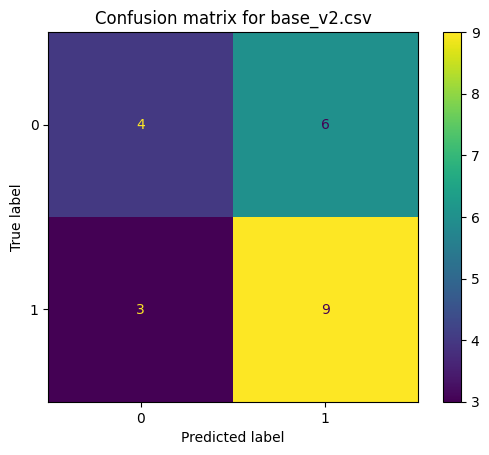

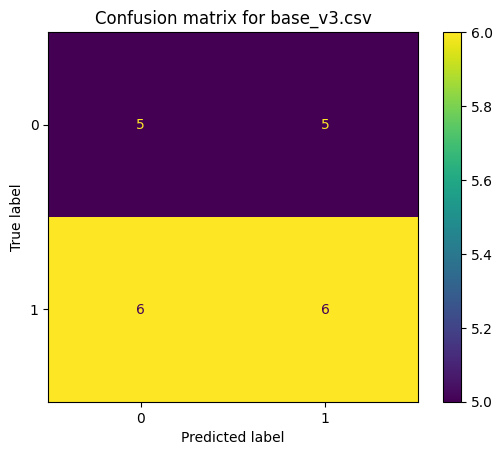

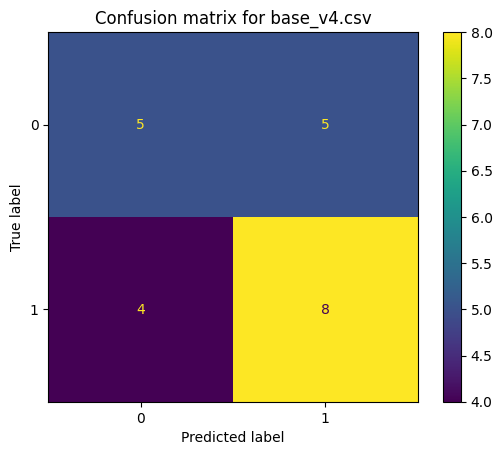

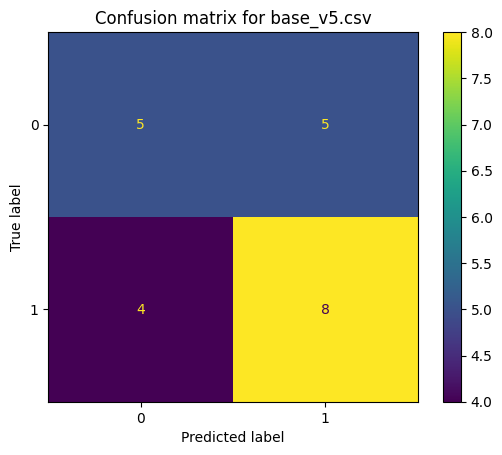

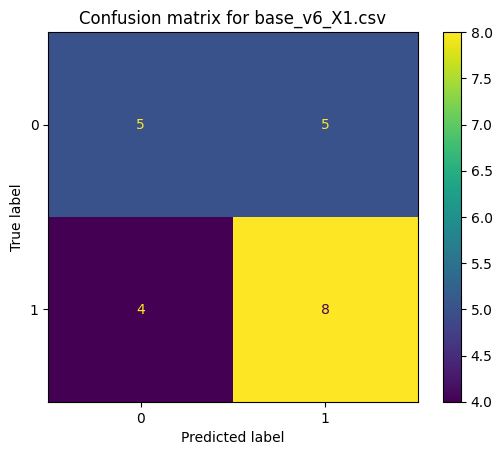

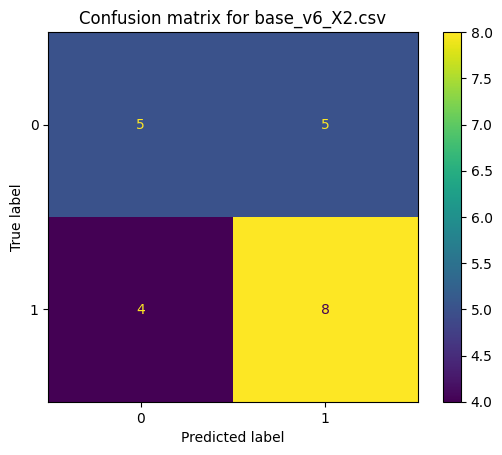

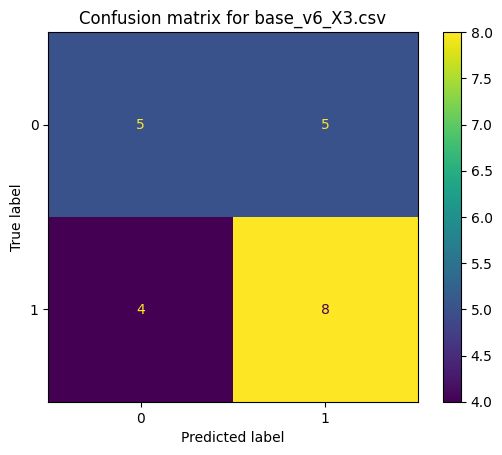

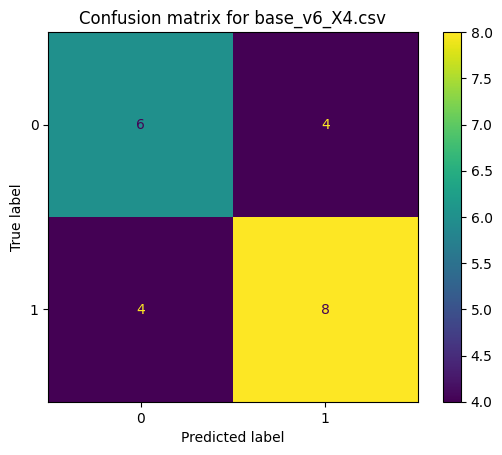

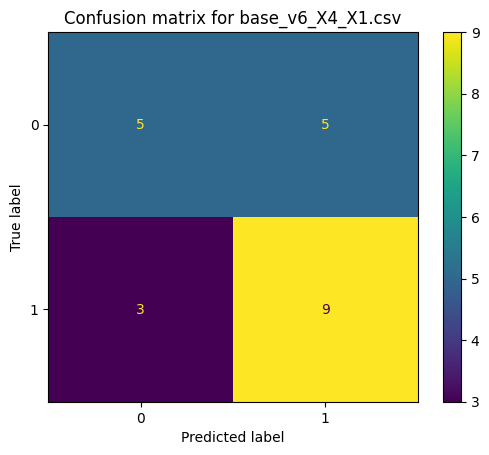

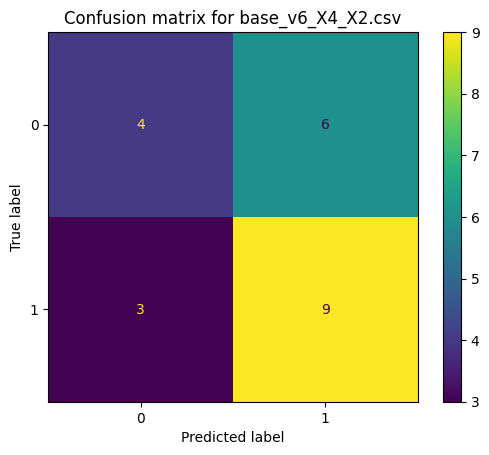

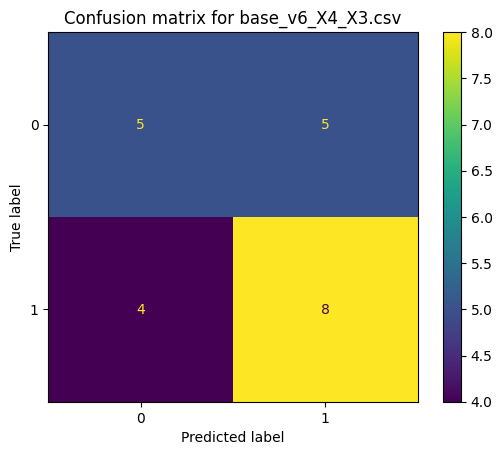

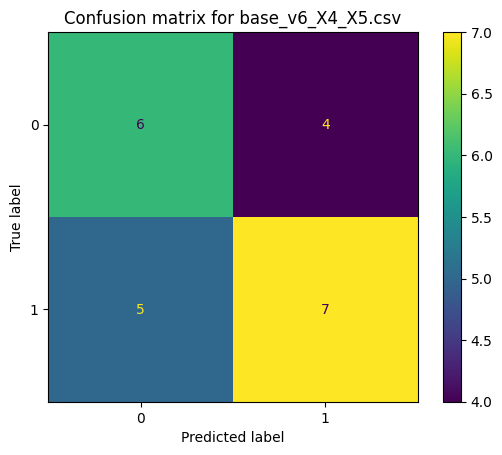

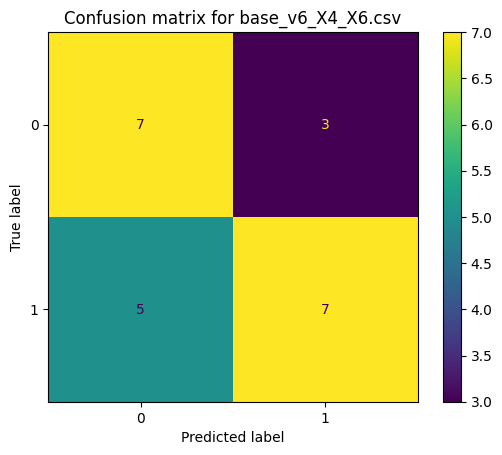

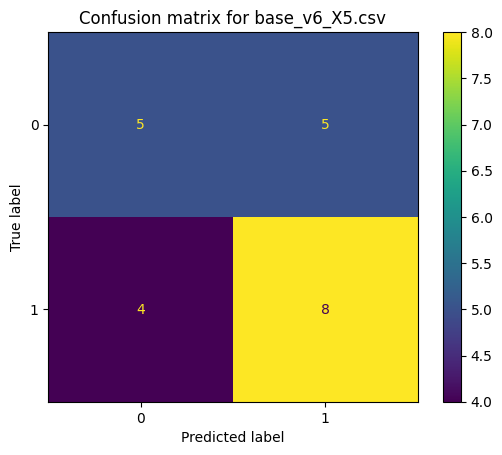

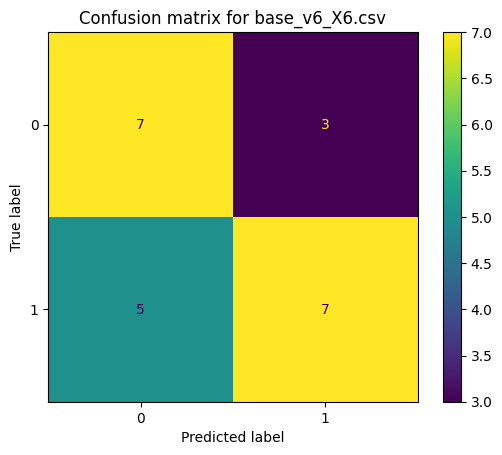

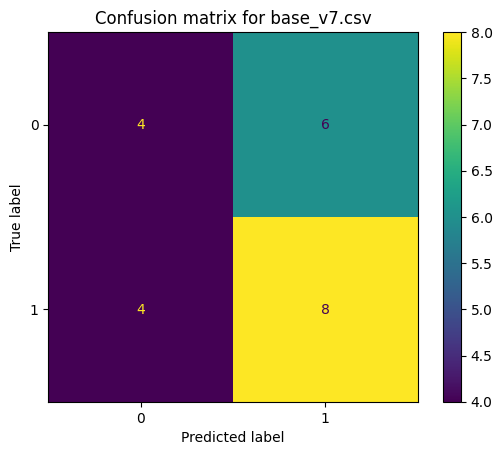

In [13]:
for df in dfs:
    model_evaluation('data/processed/{}'.format(df), XGBClassifier(random_state=42))

wow! 70% of especificity and auc roc of 60%+ with the data sets without X X6 feature!
* 'data/base_v6_X6.csv'


## 1.2 RandomForest


The path of the dataset is: ACME-HappinessSurvey2020.csv
The shape of the dataset is: (126, 7)
Accuracy score: 61.54% 
AUC ROC score: 64.24% 
Specificity score: 46.67% 

The path of the dataset is: base_v1.csv
The shape of the dataset is: (109, 7)
Accuracy score: 63.64% 
AUC ROC score: 63.33% 
Specificity score: 60.00% 

The path of the dataset is: base_v2.csv
The shape of the dataset is: (109, 5)
Accuracy score: 72.73% 
AUC ROC score: 72.50% 
Specificity score: 70.00% 

The path of the dataset is: base_v3.csv
The shape of the dataset is: (109, 7)
Accuracy score: 68.18% 
AUC ROC score: 66.67% 
Specificity score: 50.00% 

The path of the dataset is: base_v4.csv
The shape of the dataset is: (109, 6)
Accuracy score: 63.64% 
AUC ROC score: 63.33% 
Specificity score: 60.00% 

The path of the dataset is: base_v5.csv
The shape of the dataset is: (109, 6)
Accuracy score: 59.09% 
AUC ROC score: 58.33% 
Specificity score: 50.00% 

The path of the dataset is: base_v6_X1.csv
The shape of the data

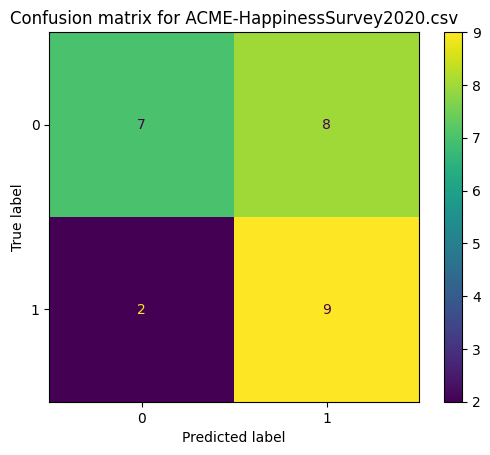

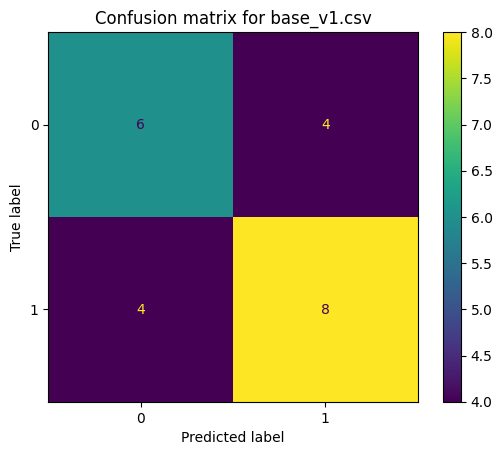

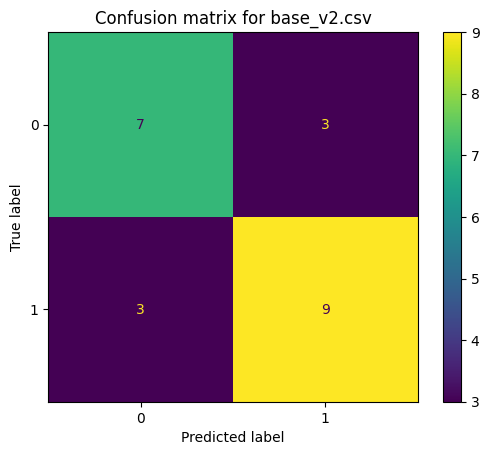

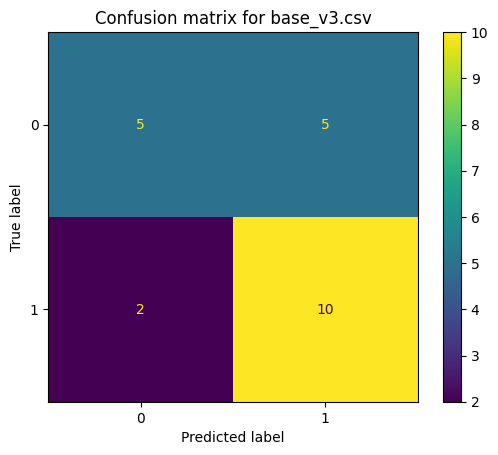

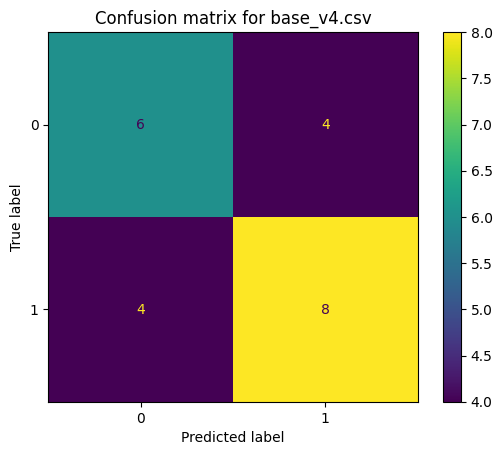

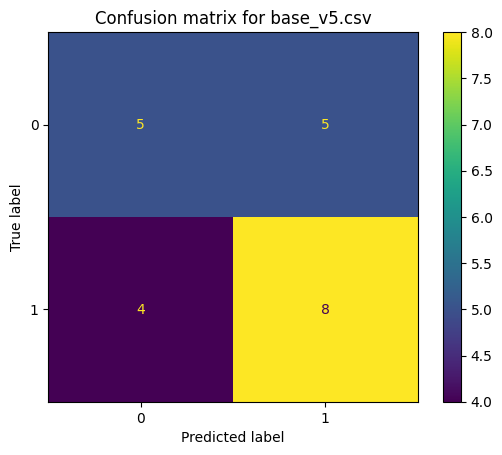

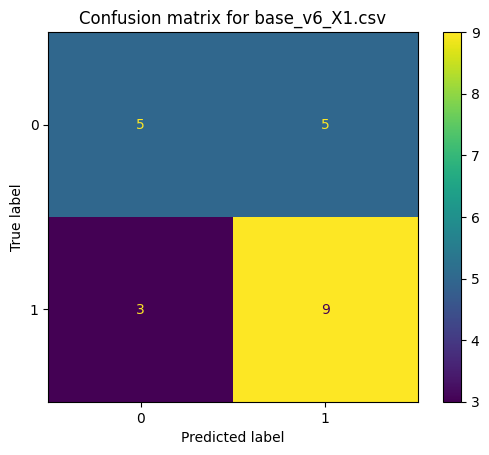

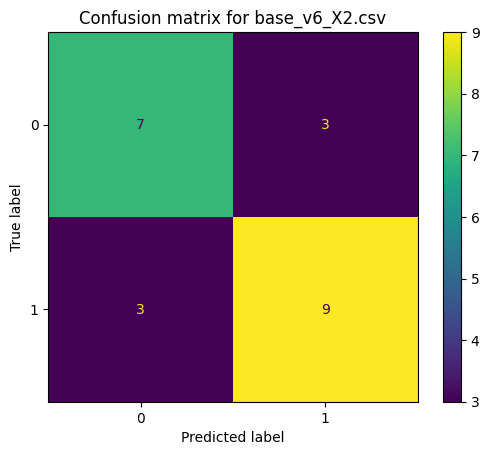

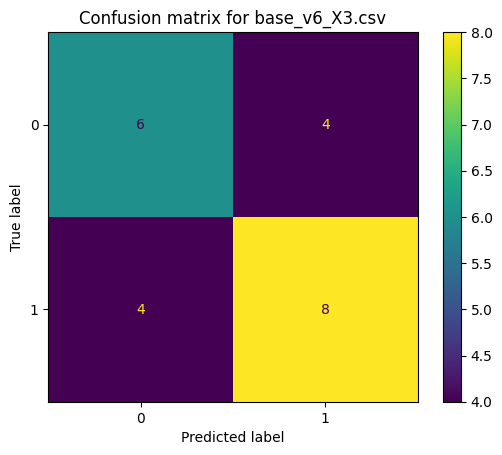

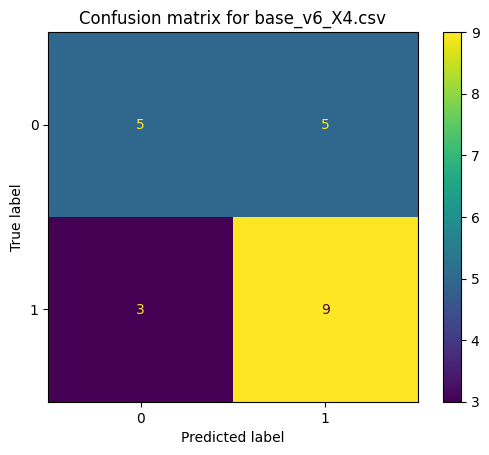

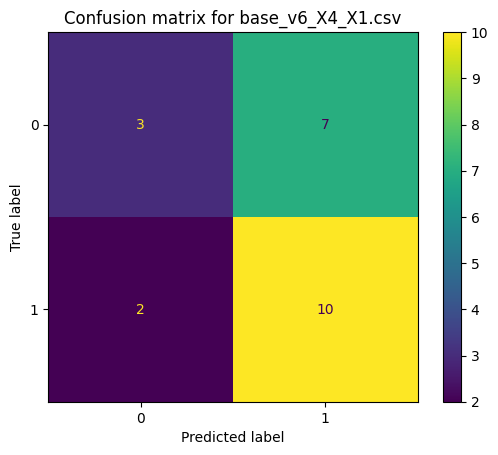

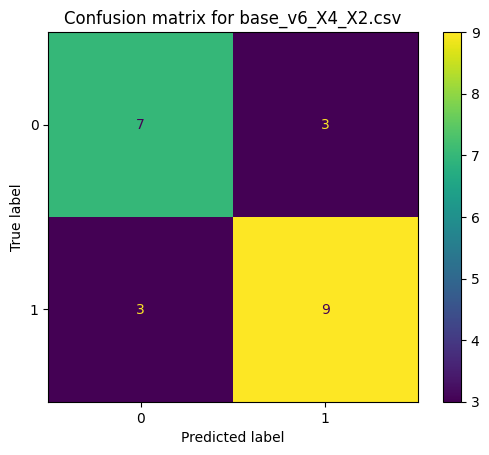

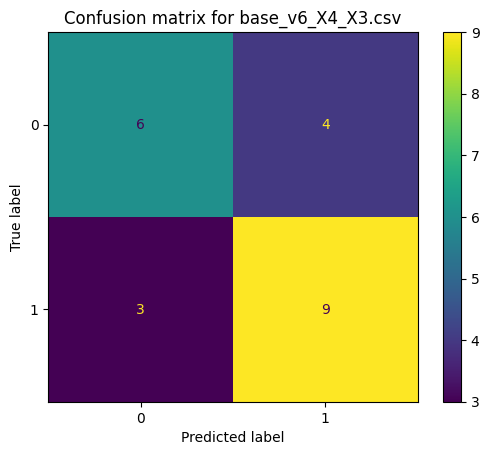

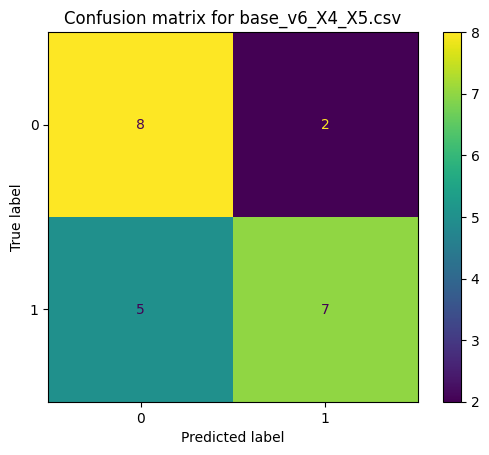

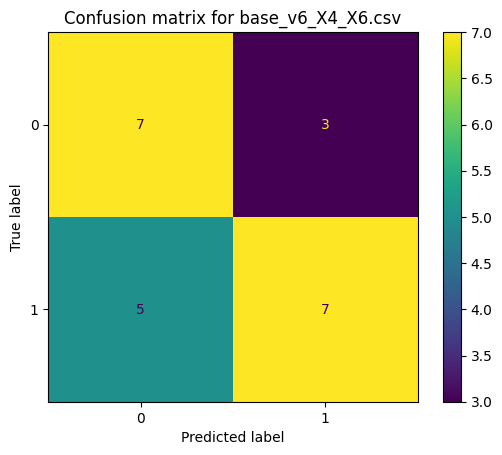

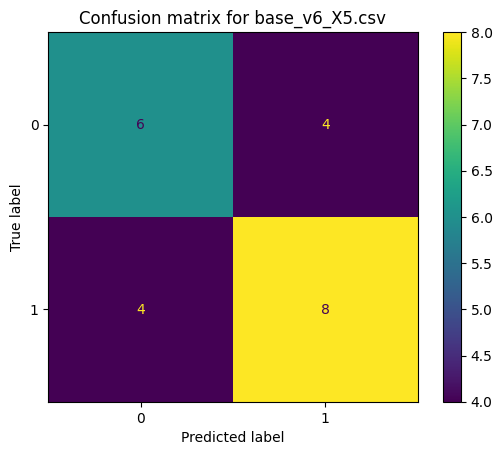

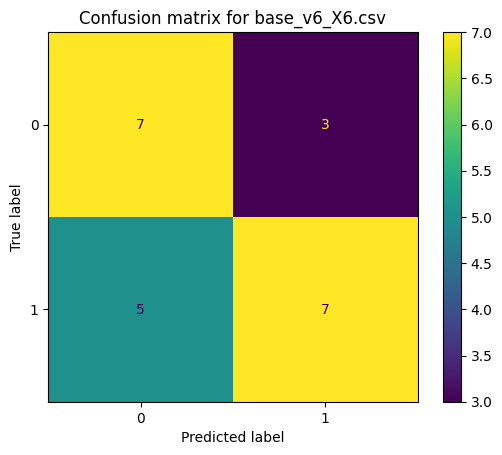

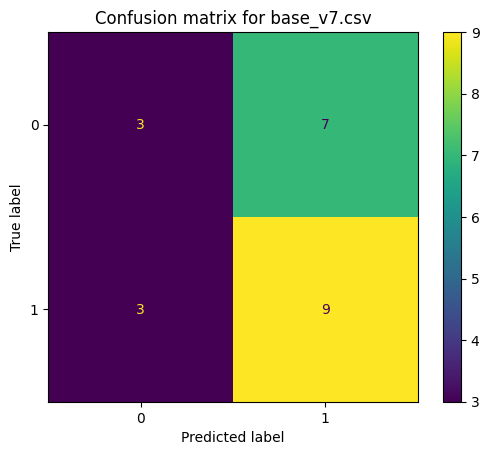

In [14]:
for df in dfs:
    model_evaluation('data/processed/{}'.format(df), RandomForestClassifier(random_state=42))

Even better than xgboost!


The path of the dataset is: base_v6_X4_X5.csv
The shape of the dataset is: (109, 5)
* Accuracy score: 68.18% 
* AUC ROC score: 69.17% 
* Specificity score: 80.00% 


The path of the dataset is: base_v2.csv
The shape of the dataset is: (109, 5)
* Accuracy score: 72.73% 
* AUC ROC score: 72.50% 
* Specificity score: 70.00% 

## 1.3 SVM


The path of the dataset is: ACME-HappinessSurvey2020.csv
The shape of the dataset is: (126, 7)
Accuracy score: 46.15% 
AUC ROC score: 50.91% 
Specificity score: 20.00% 

The path of the dataset is: base_v1.csv
The shape of the dataset is: (109, 7)
Accuracy score: 72.73% 
AUC ROC score: 70.83% 
Specificity score: 50.00% 

The path of the dataset is: base_v2.csv
The shape of the dataset is: (109, 5)
Accuracy score: 72.73% 
AUC ROC score: 70.83% 
Specificity score: 50.00% 

The path of the dataset is: base_v3.csv
The shape of the dataset is: (109, 7)
Accuracy score: 63.64% 
AUC ROC score: 60.83% 
Specificity score: 30.00% 

The path of the dataset is: base_v4.csv
The shape of the dataset is: (109, 6)
Accuracy score: 72.73% 
AUC ROC score: 70.83% 
Specificity score: 50.00% 

The path of the dataset is: base_v5.csv
The shape of the dataset is: (109, 6)
Accuracy score: 59.09% 
AUC ROC score: 56.67% 
Specificity score: 30.00% 

The path of the dataset is: base_v6_X1.csv
The shape of the data

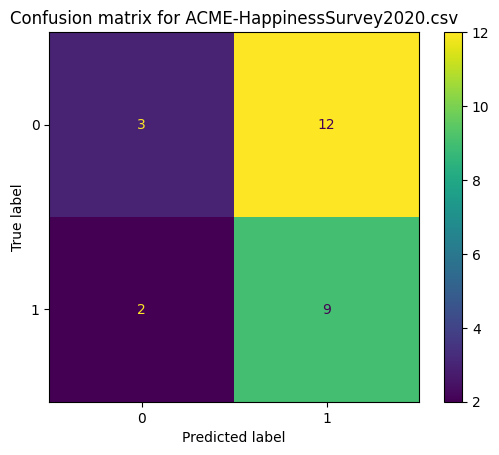

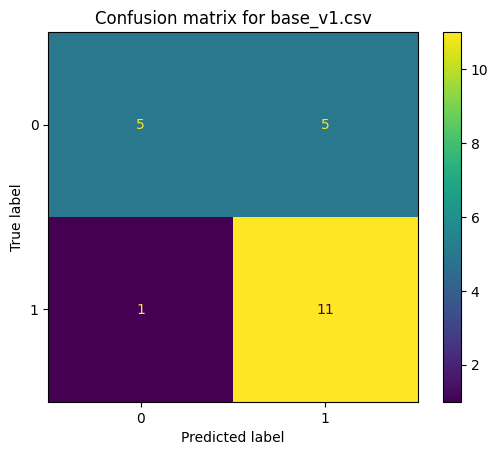

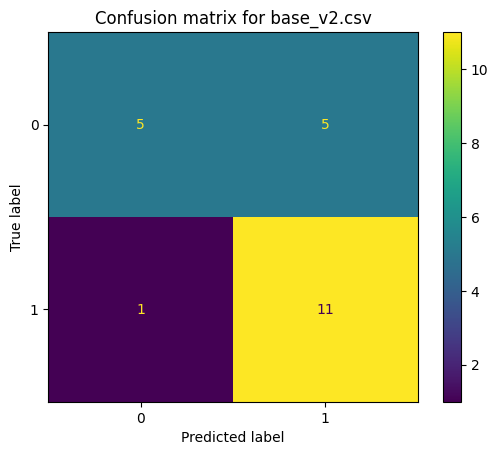

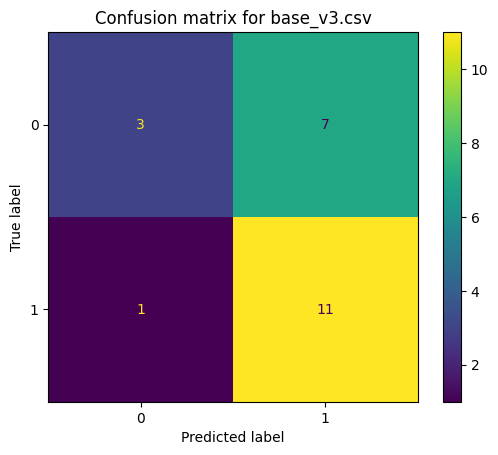

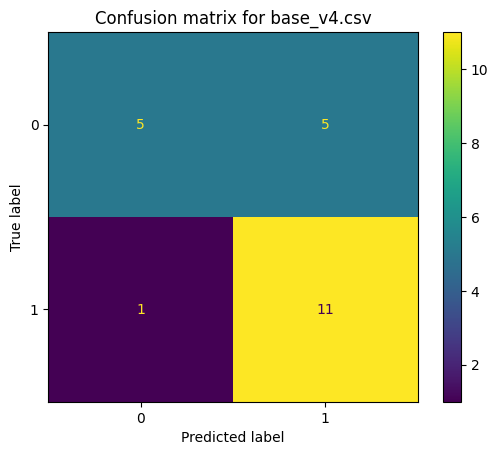

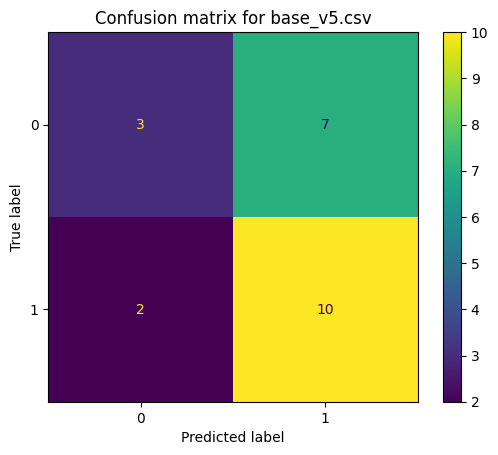

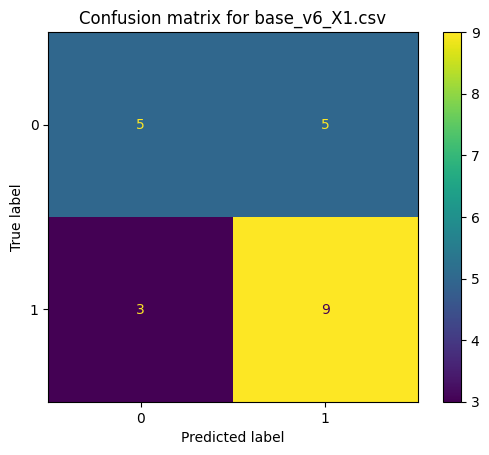

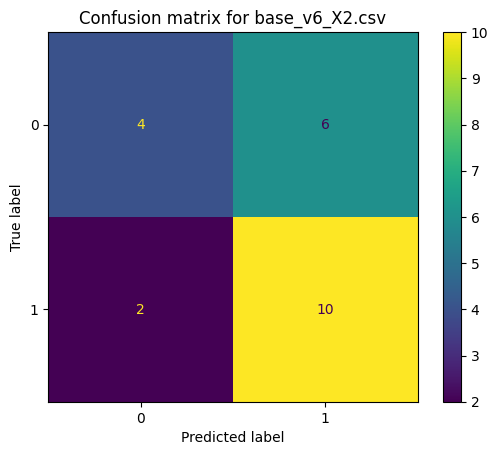

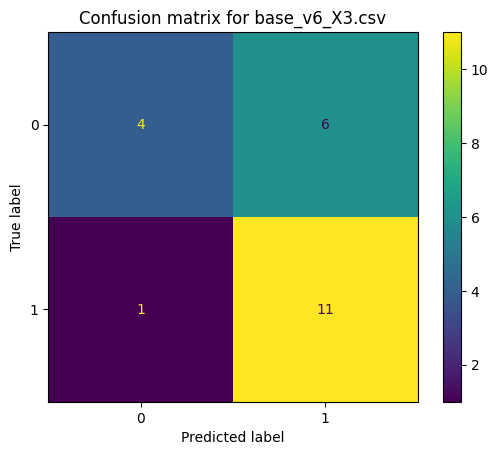

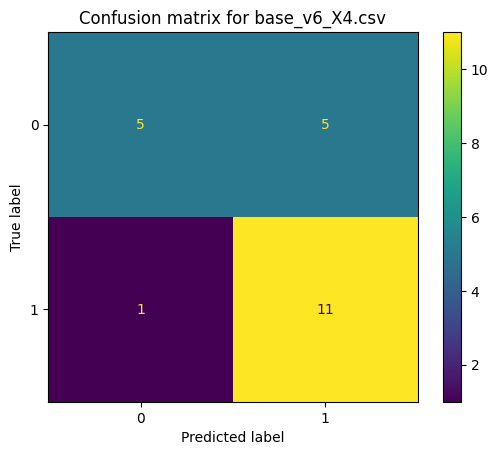

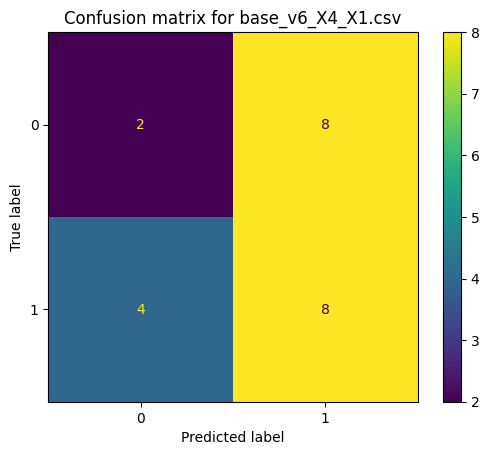

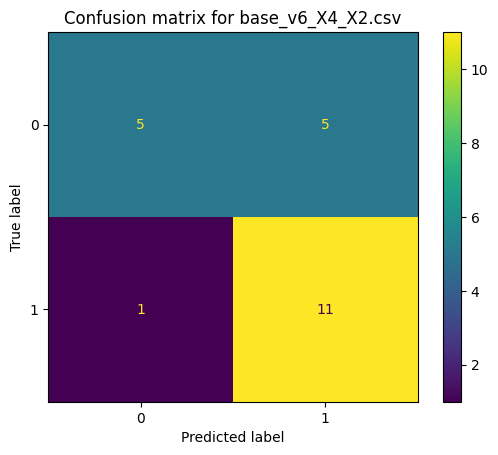

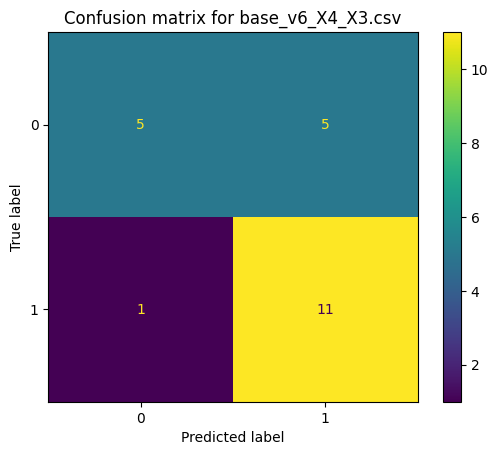

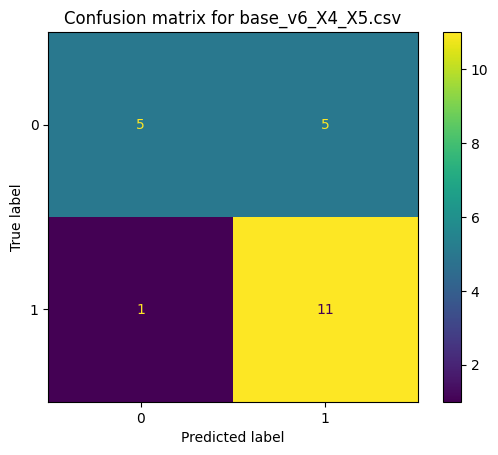

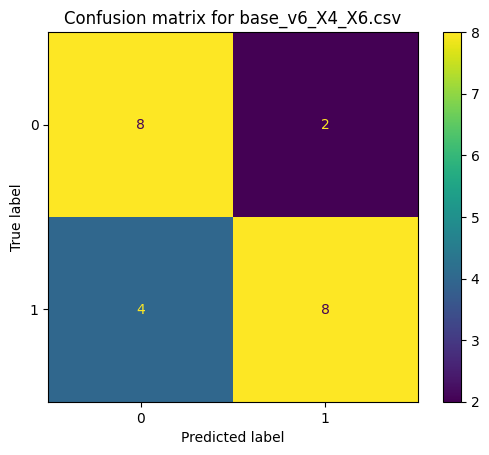

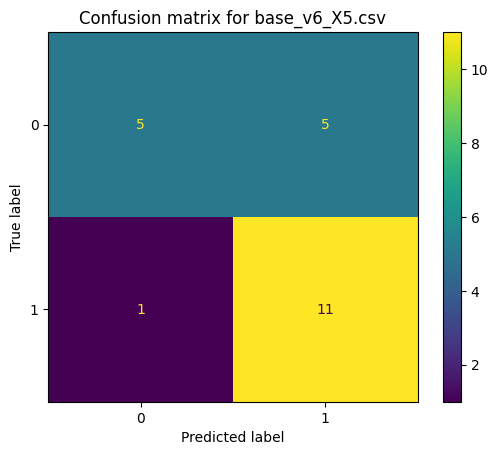

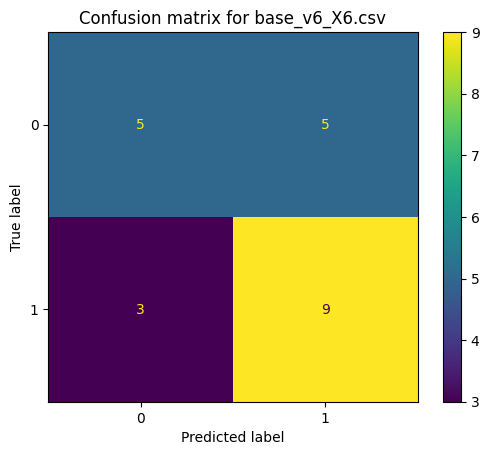

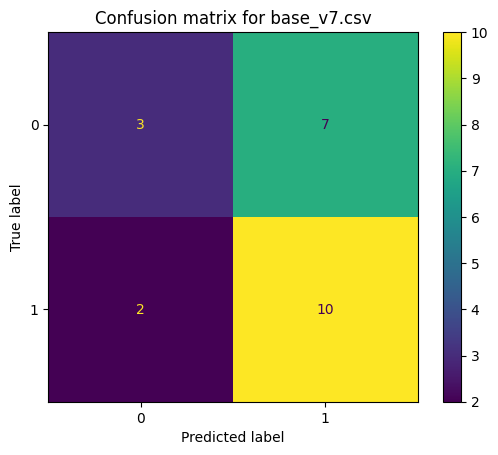

In [15]:
for df in dfs:
    model_evaluation('data/processed/{}'.format(df), SVC(random_state=42))

Best result so far:
The path of the dataset is: base_v6_X4_X6.csv
The shape of the dataset is: (109, 5)
* Accuracy score: 72.73% 
* AUC ROC score: 73.33% 
* Specificity score: 80.00% 

# Conclusion

## Dataset

1 - The dataset that gave us the best results was the one without:
* X4 = I paid a good price for my order
* X6 = the app makes ordering easy for me 

2 - Data without the datapoints that represented the minority of the dataset gave us better results. They are not outliers per say, because they are in the expected range of values, but they are not the most common values.

This makes sense because,  X4 and X6 are things that are not directly related to the satisfaction of the customer, because if they were bad, people would not even order the food  with higher price than normal or use the app that is already difficult to use, so they are not the most important features to predict the satisfaction of the customer.

## Model

The emsembled models and the best estimator for this task, SVM, gave us the best results. This is due the capacity of SVM to find the best hyperplane to separate the data, and capture the non-linear relationships between the features and the target variable. 